In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML & preprocessing
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
sns.set_style("whitegrid")

In [ ]:
df1.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [ ]:
df1=pd.read_csv("/content/train_LZdllcl.csv")

In [ ]:
df = pd.read_csv("/content/train_LZdllcl.csv")
print("Dataset shape:", df.shape)

Dataset shape: (54808, 14)


In [ ]:
df.head(10)

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   
5        58896          Analytics   region_2        Bachelor's      m   
6        20379         Operations  region_20        Bachelor's      f   
7        16290         Operations  region_34  Master's & above      m   
8        73202          Analytics  region_20        Bachelor's      m   
9        28911  Sales & Marketing   region_1  Master's & above      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   
5            sourcing                2   31                   3.0   
6               other                1   31                   3.0   
7            sourcing                1   33                   3.0   
8               other                1   28                   4.0   
9            sourcing                1   32                   5.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   
5                  7              0            0                  85   
6                  5              0            0                  59   
7                  6              0            0                  63   
8                  5              0            0                  83   
9                  5              1            0                  54   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            0  
7            0  
8            0  
9            0

In [ ]:
print(df.info())
print(df.head())
print(df.isnull().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
None
   emplo

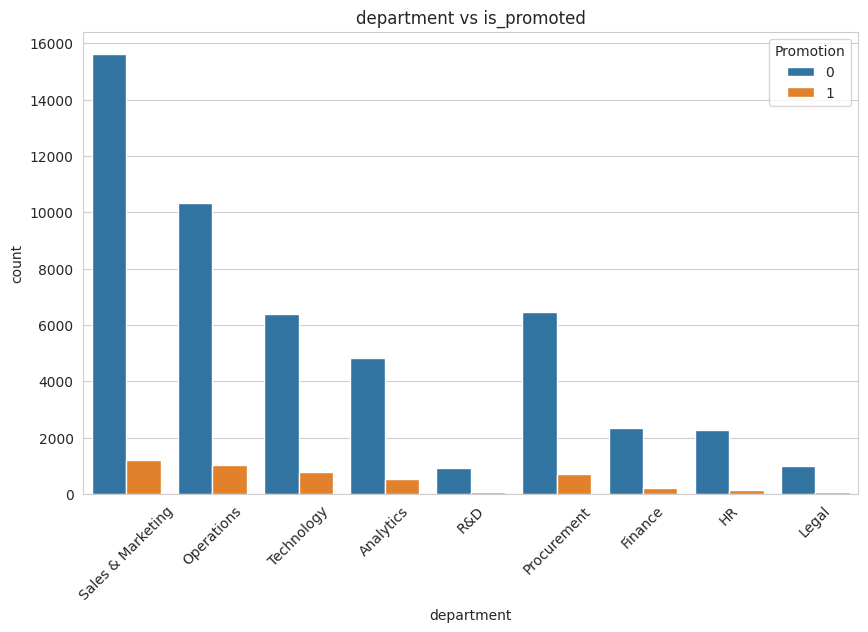

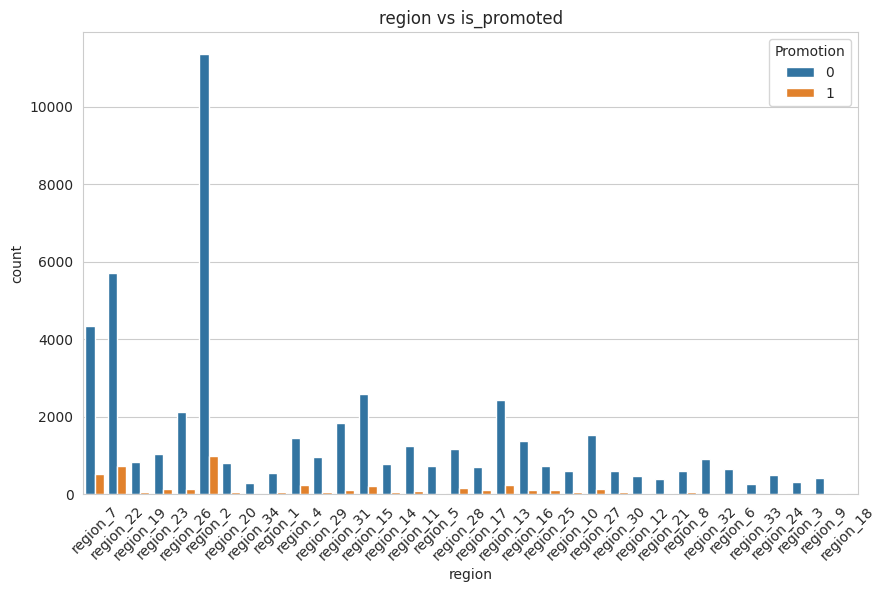

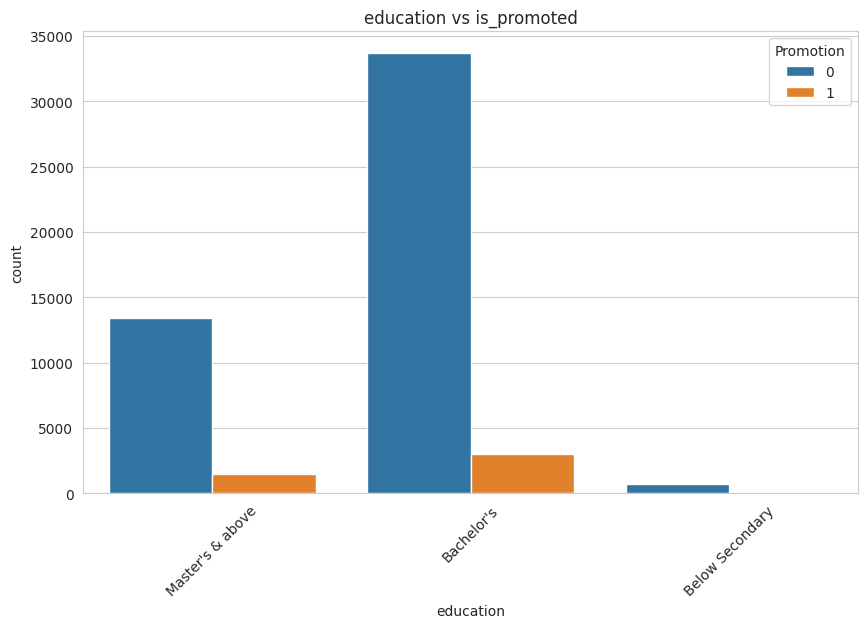

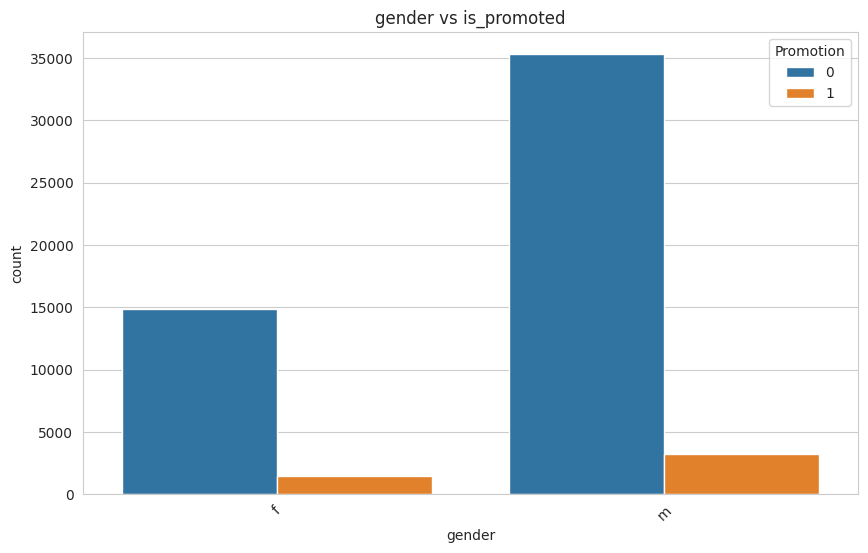

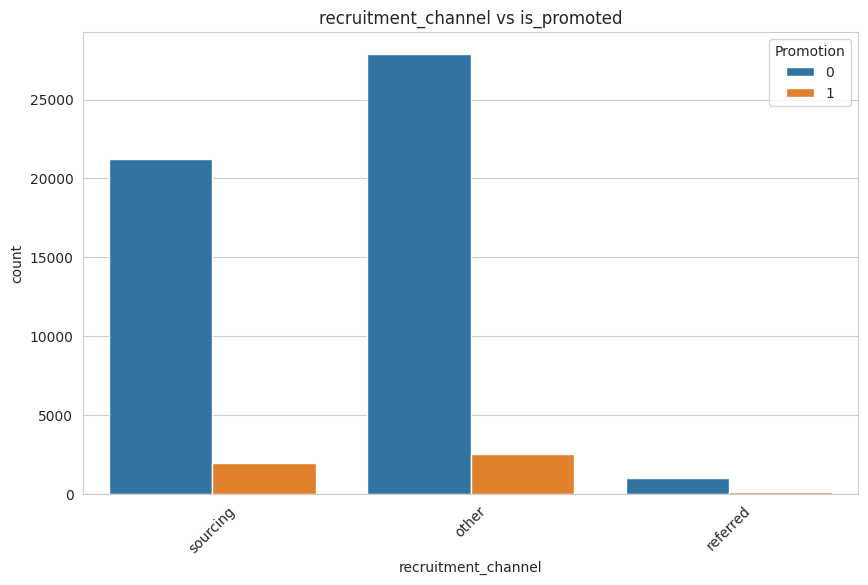

In [ ]:
categorical_cols = ["department", "region", "education", "gender", "recruitment_channel"]

for col in categorical_cols:
    plt.figure()
    sns.countplot(x=col, hue="is_promoted", data=df)
    plt.title(f"{col} vs is_promoted")
    plt.xticks(rotation=45)
    plt.legend(title="Promotion")
    plt.show()

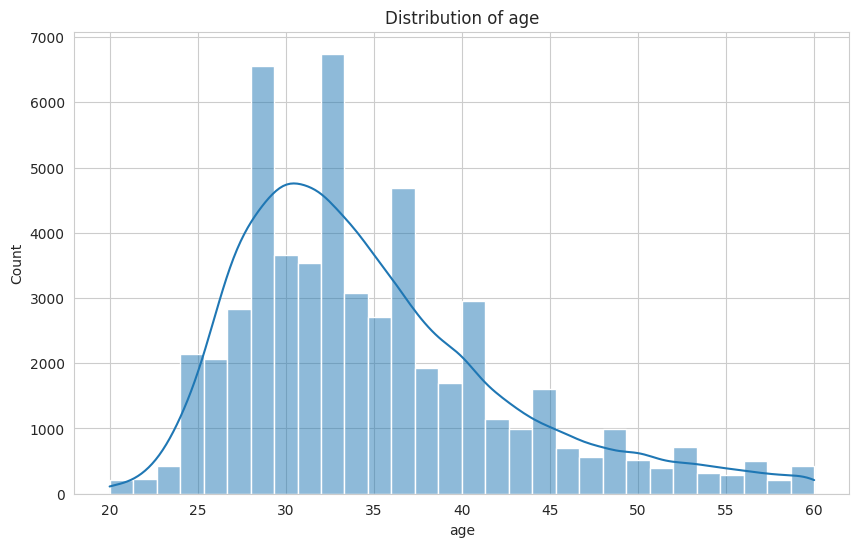

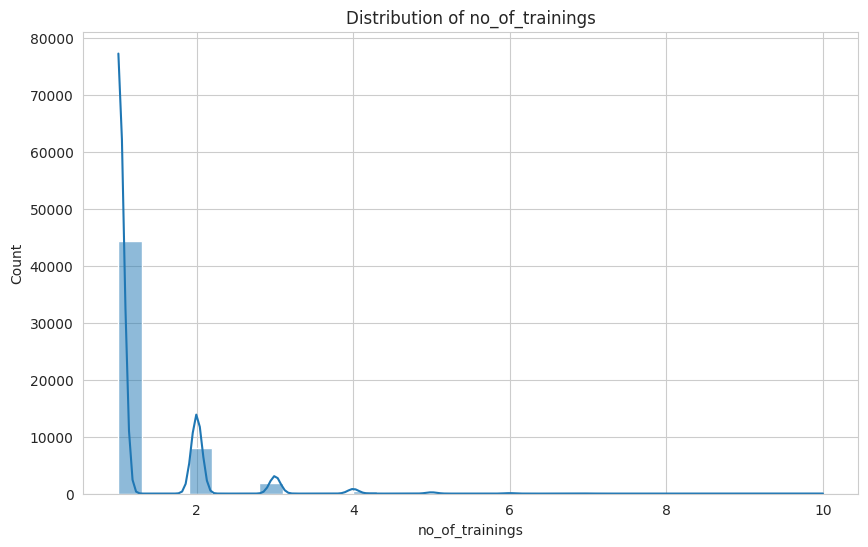

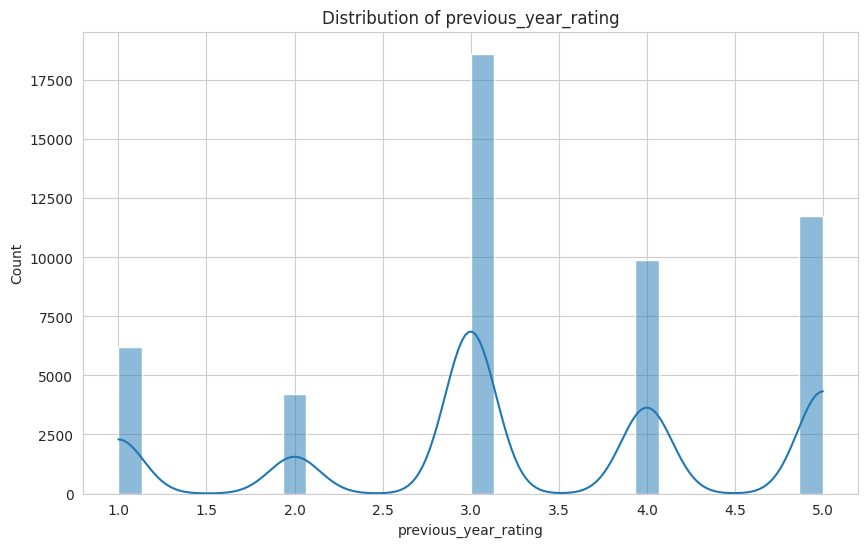

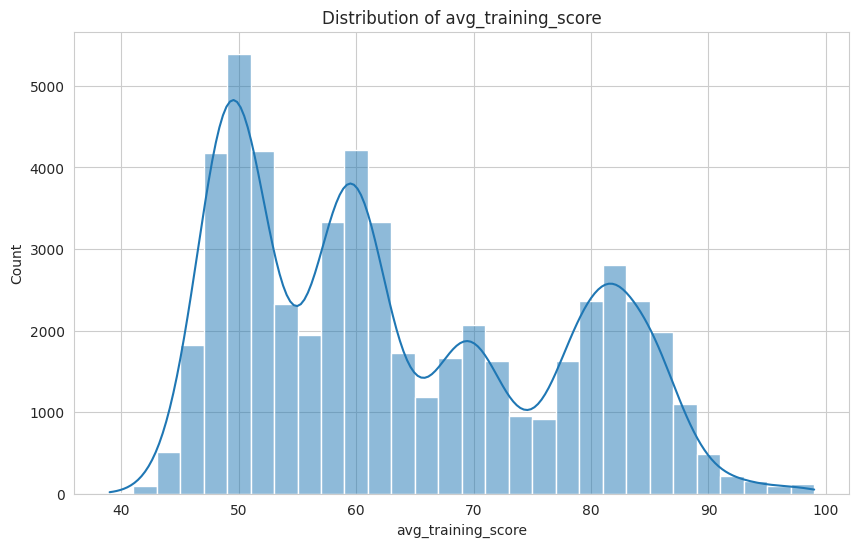

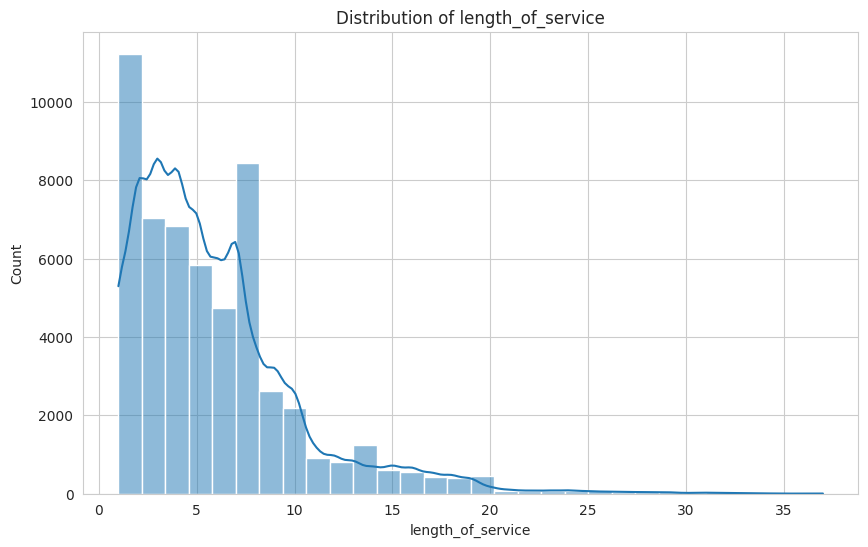

In [ ]:
numerical_cols = ["age", "no_of_trainings", "previous_year_rating", "avg_training_score", "length_of_service"]

for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

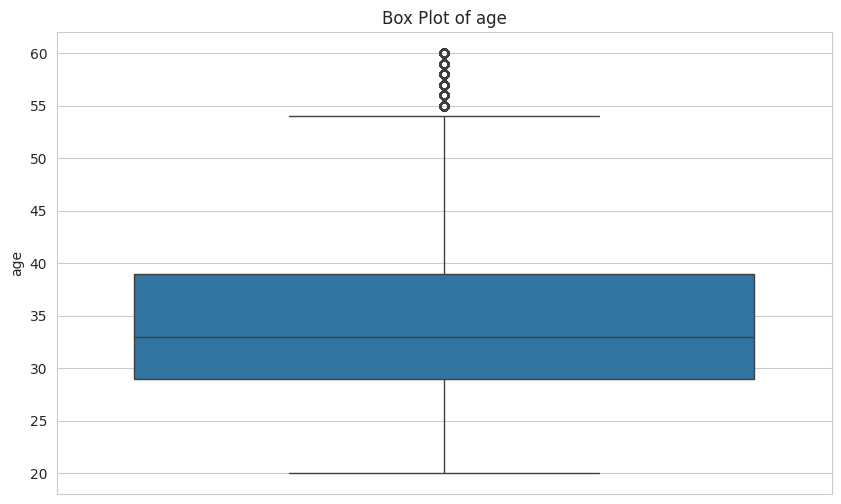

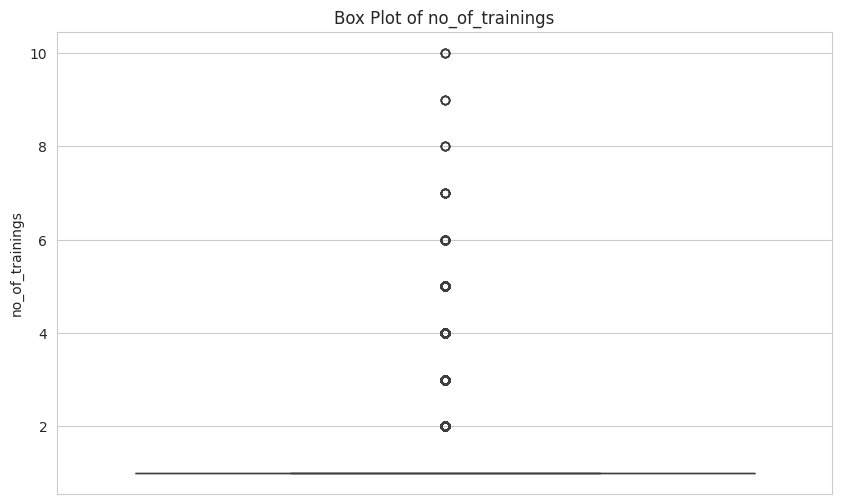

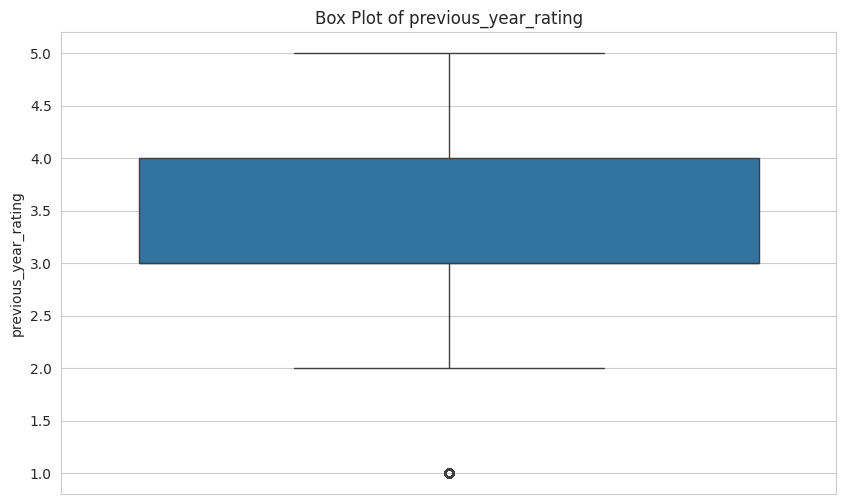

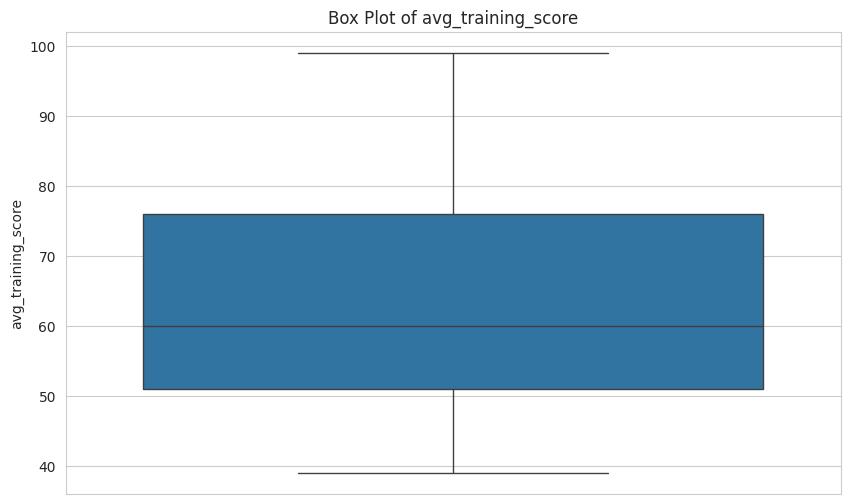

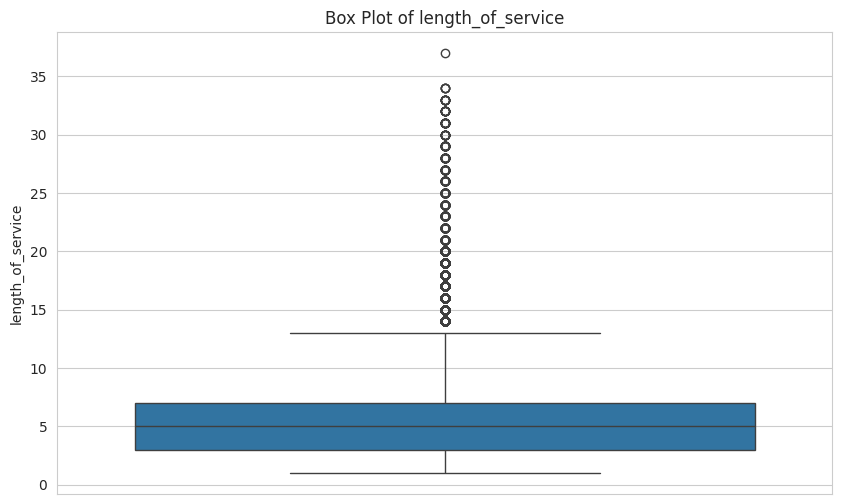

In [ ]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [ ]:
# df["age"] = np.log1p(df["age"])
# df["no_of_trainings"] = np.log1p(df["no_of_trainings"])
# df["avg_training_score"] = np.log1p(df["avg_training_score"])


In [ ]:
# for col in numerical_cols:
#     plt.figure()
#     sns.histplot(df[col], kde=True, bins=30)
#     plt.title(f"Distribution of {col}")
#     plt.show()

/tmp/ipython-input-870870528.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


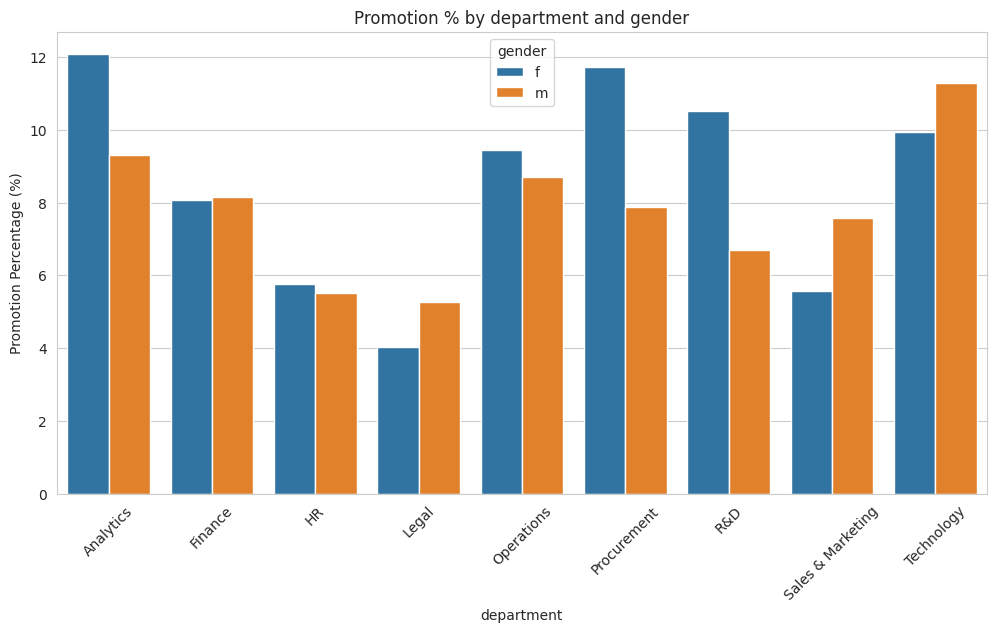

/tmp/ipython-input-870870528.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


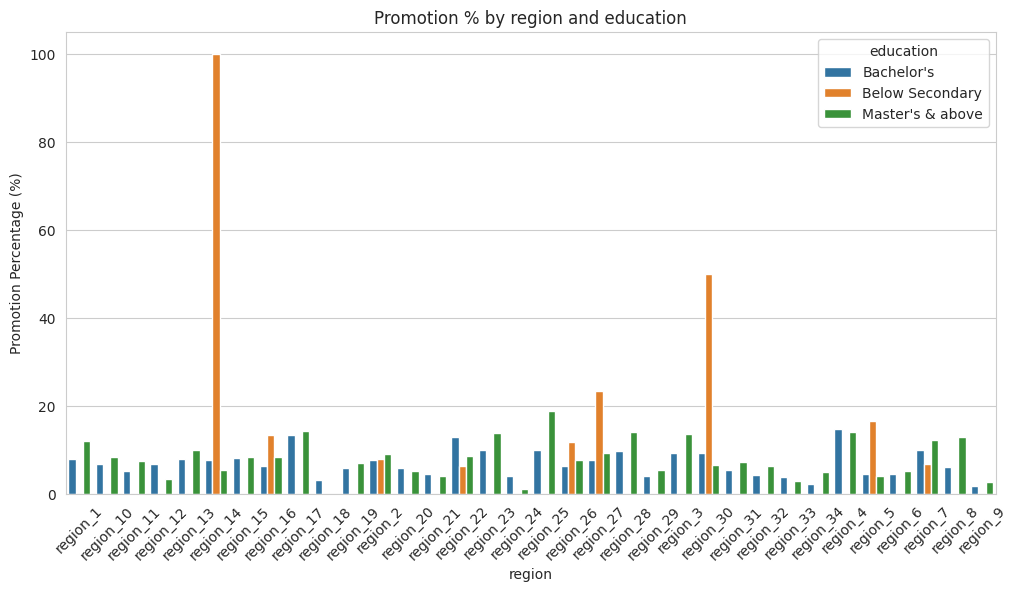

/tmp/ipython-input-870870528.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


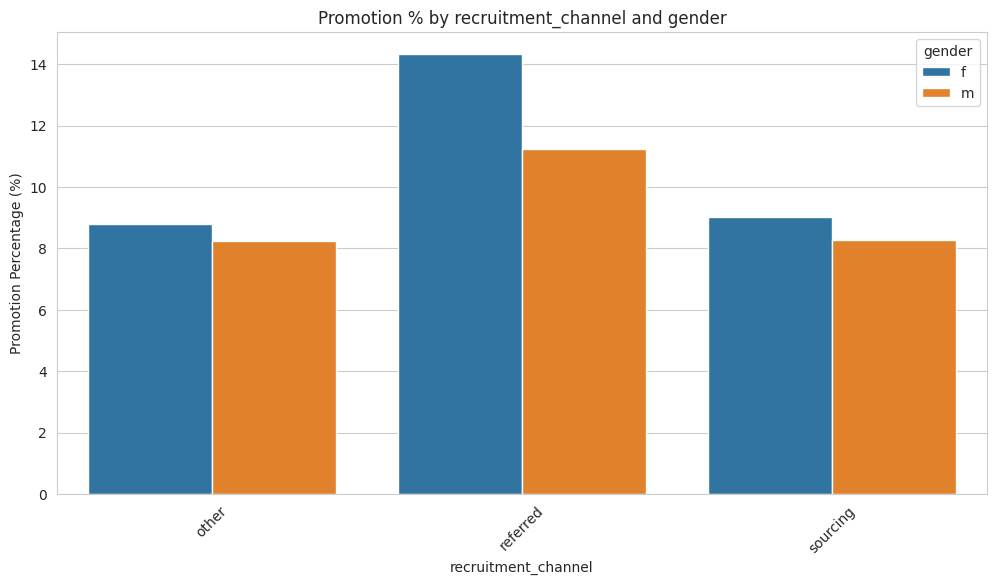

/tmp/ipython-input-870870528.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


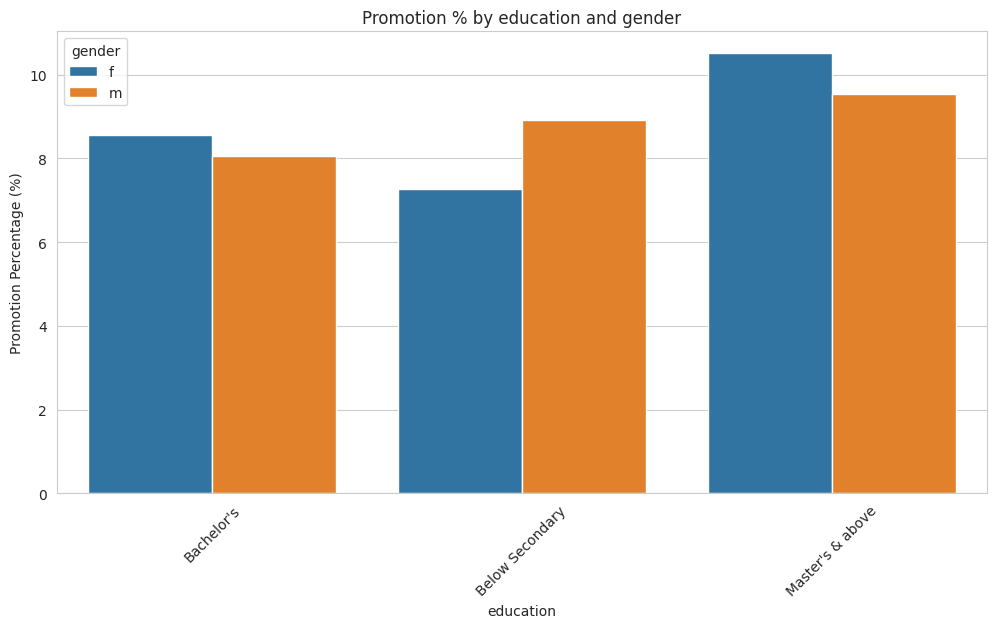

/tmp/ipython-input-870870528.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


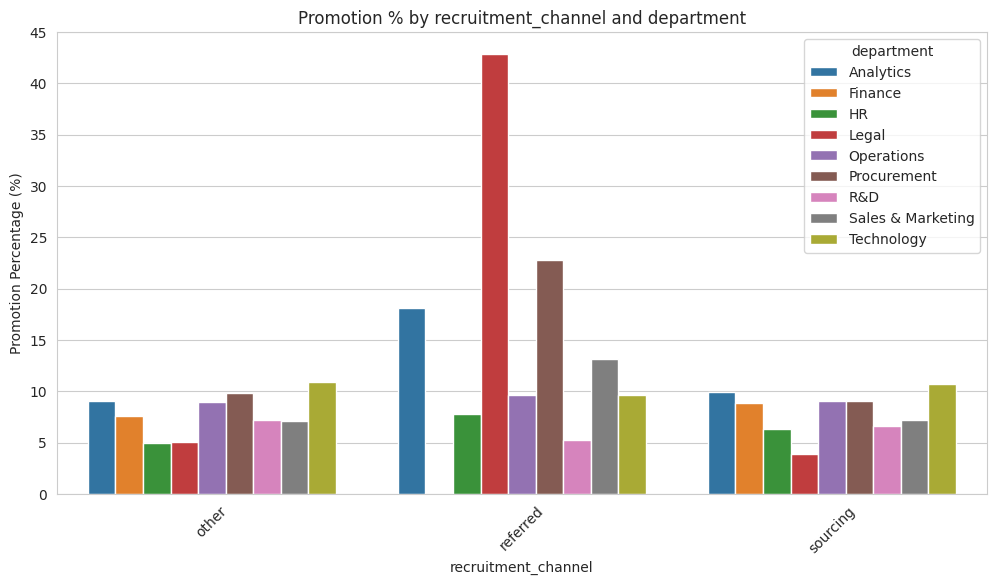

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

def plot_promotion_by_two_cats(df, col1, col2):
    # Copy and treat missing as category
    temp = df.copy()

    # Group and compute promotion percentage
    grp = (
        temp.groupby([col1, col2])["is_promoted"]
        .agg(total_count="count", promoted_count="sum")
        .reset_index()
    )
    grp["promotion_percentage"] = (
        grp["promoted_count"] / grp["total_count"]
    ) * 100

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=grp,
        x=col1,
        y="promotion_percentage",
        hue=col2,
        ci=None
    )

    plt.title(f"Promotion % by {col1} and {col2}")
    plt.ylabel("Promotion Percentage (%)")
    plt.xticks(rotation=45)
    plt.legend(title=col2)
    plt.show()

# Example usage:
plot_promotion_by_two_cats(df, "department", "gender")
plot_promotion_by_two_cats(df, "region", "education")
plot_promotion_by_two_cats(df, "recruitment_channel", "gender")
plot_promotion_by_two_cats(df, "education", "gender")
plot_promotion_by_two_cats(df, "recruitment_channel", "department")


CORRELATION MATRIX

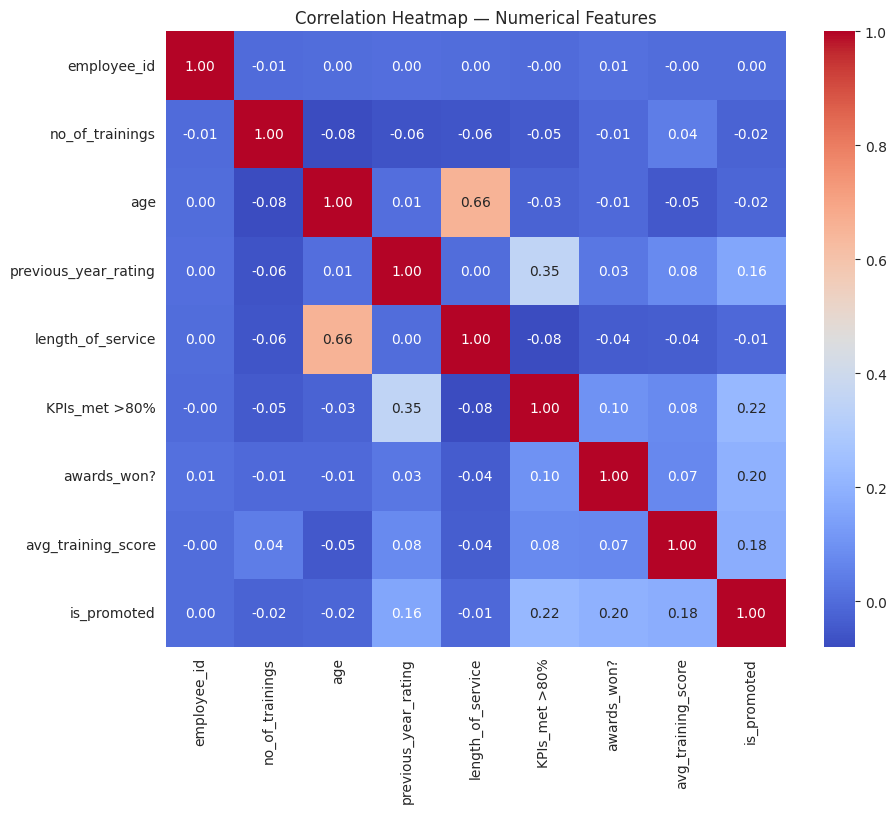

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Compute correlation matrix
num_corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(num_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap — Numerical Features")
plt.show()

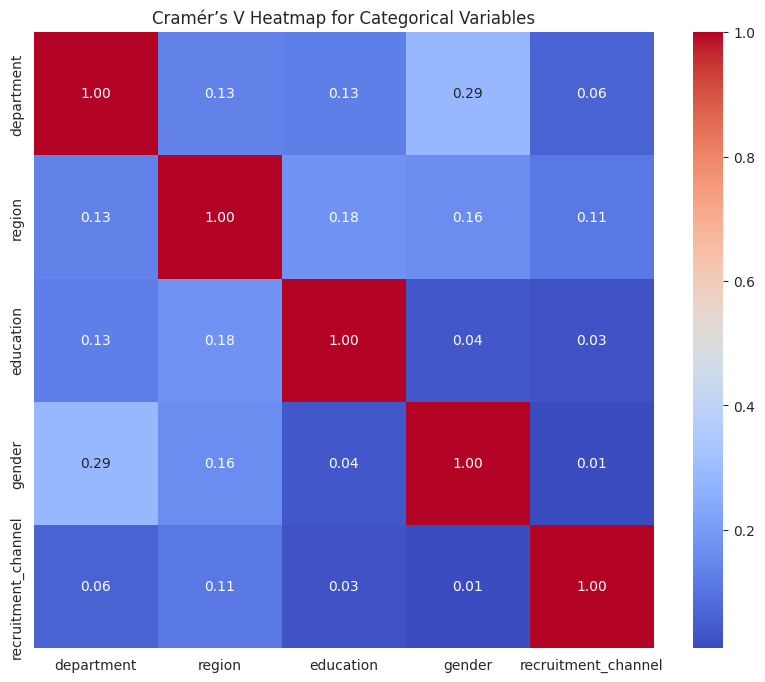

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1) Get categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# 2) Define function to calculate Cramér’s V
def cramers_v(x, y):
    # impute missing with mode for each column
    x = x.fillna(x.mode()[0])
    y = y.fillna(y.mode()[0])

    confusion = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion)
    n = confusion.sum().sum()

    # phi2 and Cramér’s V calculation
    phi2 = chi2 / n
    r, k = confusion.shape
    return np.sqrt(phi2 / min((k-1), (r-1)))

# 3) Create an empty DataFrame for results
cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

# 4) Fill matrix with values
for c1 in cat_cols:
    for c2 in cat_cols:
        if c1 == c2:
            cramer_matrix.loc[c1, c2] = 1.0
        else:
            cramer_matrix.loc[c1, c2] = cramers_v(df[c1], df[c2])

# 5) Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cramér’s V Heatmap for Categorical Variables")
plt.show()


In [ ]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns

for col in cat_cols:
    print(col, ":", df[col].unique())


department : ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region : ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education : ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender : ['f' 'm']
recruitment_channel : ['sourcing' 'other' 'referred']


In [ ]:
#previous_year_rating    4124
#education               2409

mean_rating = df["previous_year_rating"].mean()
df["previous_year_rating"] = df["previous_year_rating"].fillna(mean_rating)

# Replace missing values in education with the mode
mode_education = df["education"].mode()[0]
df["education"] = df["education"].fillna(mode_education)

In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


In [ ]:
df.head(5)

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [ ]:
df["service_level"] = pd.cut(
    df["length_of_service"],
    bins=[0, 2, 5, 10, 30],
    labels=["Junior", "Mid", "Senior", "Veteran"]
)

In [ ]:
df.head(5)

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted service_level  
0            0        Senior  
1            0           Mid  
2            0        Senior  
3            0        Senior  
4            0        Junior

In [ ]:
df['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [ ]:
bins = [0, 17, 24, 34, 49, 64,100]
labels = ["Child/Youth", "Young Adult", "Early Career", "Mid Career", "Late Career", "Senior"]
df["age_group_alt"] = pd.cut(df["age"], bins=bins, labels=labels)


In [ ]:
df.head(10)

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   
5        58896          Analytics   region_2        Bachelor's      m   
6        20379         Operations  region_20        Bachelor's      f   
7        16290         Operations  region_34  Master's & above      m   
8        73202          Analytics  region_20        Bachelor's      m   
9        28911  Sales & Marketing   region_1  Master's & above      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   
5            sourcing                2   31                   3.0   
6               other                1   31                   3.0   
7            sourcing                1   33                   3.0   
8               other                1   28                   4.0   
9            sourcing                1   32                   5.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   
5                  7              0            0                  85   
6                  5              0            0                  59   
7                  6              0            0                  63   
8                  5              0            0                  83   
9                  5              1            0                  54   

   is_promoted service_level age_group_alt  
0            0        Senior    Mid Career  
1            0           Mid  Early Career  
2            0        Senior  Early Career  
3            0        Senior    Mid Career  
4            0        Junior    Mid Career  
5            0        Senior  Early Career  
6            0           Mid  Early Career  
7            0        Senior  Early Career  
8            0           Mid  Early Career  
9            0           Mid  Early Career

In [ ]:
df["age_group_alt"].value_counts()

age_group_alt
Early Career    29757
Mid Career      19963
Late Career      3373
Young Adult      1715
Child/Youth         0
Senior              0
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["is_promoted","employee_id","service_level","age_group_alt"], axis=1)
y = df["is_promoted"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Scale numeric features *after* filling missing values with the mean
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),      # Fill missing with mean
    ("scaler", StandardScaler())                       # Then scale
])

# Encode categorical features *after* filling missing with most frequent category
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing with mode
    ("encoder", OneHotEncoder(handle_unknown="ignore"))    # Then one-hot encode
])


In [ ]:


num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
preprocess = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_reg = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]

print("Logistic Regression")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     10054
           1       0.24      0.84      0.38       908

    accuracy                           0.77     10962
   macro avg       0.61      0.80      0.62     10962
weighted avg       0.92      0.77      0.82     10962

ROC AUC: 0.8816117634377885


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


y_pred_train = log_reg.predict(X_train)
y_proba_train = log_reg.predict_proba(X_train)[:,1]

print("Logistic Regression")
print(classification_report(y_train, y_pred_train))
print("ROC AUC:", roc_auc_score(y_train, y_proba_train))

Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     40086
           1       0.24      0.81      0.38      3760

    accuracy                           0.77     43846
   macro avg       0.61      0.79      0.62     43846
weighted avg       0.91      0.77      0.82     43846

ROC AUC: 0.8775471599093863


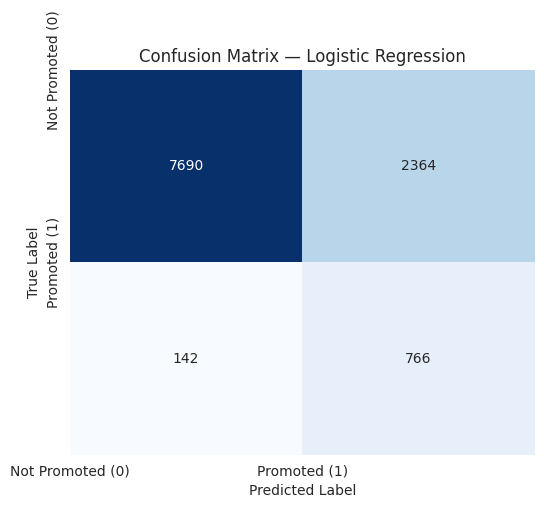

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=[0,1], labels=["Not Promoted (0)", "Promoted (1)"])
plt.yticks(ticks=[0,1], labels=["Not Promoted (0)", "Promoted (1)"])
plt.show()


In [ ]:
ign_Cols=['employee_id']
test=pd.read_csv('/content/test_2umaH9m.csv')

In [ ]:
submission = pd.read_csv("/content/sample_submission_M0L0uXE.csv")


# 4) Fill with predictions
submission["is_promoted"] =log_reg.predict(test.drop(columns=ign_Cols))

# 5) Save
submission.to_csv("final_submission.csv", index=False)
print("Saved submission as final_submission.csv")

Saved submission as final_submission.csv


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = Pipeline([
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced"   # helps with imbalanced dataset
    ))
])

# Train
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:,1]

print("Decision Tree Classifier")
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_train,dt_model.predict(X_train)))
print("ROC AUC:", roc_auc_score(y_test, y_proba_dt))


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10054
           1       0.40      0.44      0.42       908

    accuracy                           0.90     10962
   macro avg       0.67      0.69      0.68     10962
weighted avg       0.90      0.90      0.90     10962

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40086
           1       1.00      1.00      1.00      3760

    accuracy                           1.00     43846
   macro avg       1.00      1.00      1.00     43846
weighted avg       1.00      1.00      1.00     43846

ROC AUC: 0.6908571467380112


In [ ]:
# 1) Load test data
test=pd.read_csv('/content/test_2umaH9m.csv')

# 2) Predict binary labels
dt_test_pred = dt_model.predict(test.drop(columns=ign_Cols))

# 3) Load sample submission
submission = pd.read_csv("/content/sample_submission_M0L0uXE.csv")

# 4) Fill and save
submission["is_promoted"] = dt_test_pred
submission.to_csv("submission_decision_tree.csv", index=False)

print("Decision Tree submission saved!")


Decision Tree submission saved!


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=500,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    ))
])

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_train, rf_model.predict(X_train)))

print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.85      0.29      0.43       908

    accuracy                           0.94     10962
   macro avg       0.90      0.64      0.70     10962
weighted avg       0.93      0.94      0.92     10962

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40086
           1       1.00      1.00      1.00      3760

    accuracy                           1.00     43846
   macro avg       1.00      1.00      1.00     43846
weighted avg       1.00      1.00      1.00     43846

ROC AUC: 0.8880355003684948


In [ ]:

test=pd.read_csv('/content/test_2umaH9m.csv')
rf_test_pred = rf_model.predict(test.drop(columns=ign_Cols))

# Load sample submission
submission = pd.read_csv("/content/sample_submission_M0L0uXE.csv")

# Fill & save
submission["is_promoted"] = rf_test_pred
submission.to_csv("submission_random_forest.csv", index=False)

print("Random Forest submission saved!")

Random Forest submission saved!


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = Pipeline([
    ("preprocess", preprocess),
    ("model", AdaBoostClassifier(
        n_estimators=100,
        random_state=42
    ))
])

# Train
ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)
y_proba_ada = ada_model.predict_proba(X_test)[:,1]

print("AdaBoost Classifier")
print(classification_report(y_test, y_pred_ada))
print("ROC AUC:", roc_auc_score(y_test, y_proba_ada))


AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10054
           1       0.83      0.16      0.27       908

    accuracy                           0.93     10962
   macro avg       0.88      0.58      0.62     10962
weighted avg       0.92      0.93      0.90     10962

ROC AUC: 0.8581772415739151


In [ ]:
# Predict

test=pd.read_csv('/content/test_2umaH9m.csv')
ada_test_pred = ada_model.predict(test.drop(columns=ign_Cols))

# Load and fill
submission = pd.read_csv("/content/sample_submission_M0L0uXE.csv")
submission["is_promoted"] = ada_test_pred
submission.to_csv("submission_adaboost.csv", index=False)

print("AdaBoost submission saved!")


AdaBoost submission saved!


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = Pipeline([
    ("preprocess", preprocess),
    ("model", GradientBoostingClassifier(
        random_state=42
    ))
])

# Train
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:,1]

print("Gradient Boosting Classifier")
print(classification_report(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_gb))


Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.96      0.29      0.44       908

    accuracy                           0.94     10962
   macro avg       0.95      0.64      0.71     10962
weighted avg       0.94      0.94      0.92     10962

ROC AUC: 0.9054191616372909


In [ ]:
# Predict

test=pd.read_csv('/content/test_2umaH9m.csv')
gb_test_pred = gb_model.predict(test.drop(columns=ign_Cols))

# Load and fill
submission = pd.read_csv("/content/sample_submission_M0L0uXE.csv")
submission["is_promoted"] = gb_test_pred
submission.to_csv("submission_gradient_boosting.csv", index=False)

print("Gradient Boosting submission saved!")


Gradient Boosting submission saved!


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, f1_score


In [ ]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


LOGISTIC REGRESSION GRID SEARCH CV

In [ ]:
log_reg_enhanced = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

param_grid_lr = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l2"],
    "model__solver": ["lbfgs", "liblinear"]
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=cv_strategy, scoring="f1", n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best LR Params:", grid_lr.best_params_)
print(classification_report(y_test, grid_lr.best_estimator_.predict(X_test)))


Best LR Params: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     10054
           1       0.24      0.84      0.38       908

    accuracy                           0.77     10962
   macro avg       0.61      0.80      0.62     10962
weighted avg       0.92      0.77      0.82     10962



In [ ]:
submission = pd.read_csv("/content/sample_submission_M0L0uXE.csv")


# 4) Fill with predictions
submission["is_promoted"] =grid_lr.best_estimator_.predict(test.drop(columns=ign_Cols))

# 5) Save
submission.to_csv("logistic_reg_enhanced_submission.csv", index=False)
print("Saved submission as final_submission.csv")

Saved submission as final_submission.csv


DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = Pipeline([
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(class_weight="balanced", random_state=42))
])

param_grid_dt = {
    "model__max_depth": [None, 5, 10, 15],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__criterion": ["gini", "entropy"]
}

grid_dt = GridSearchCV(dt, param_grid_dt, cv=cv_strategy, scoring="f1", n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Best DT Params:", grid_dt.best_params_)
print(classification_report(y_test, grid_dt.best_estimator_.predict(X_test)))


Best DT Params: {'model__criterion': 'entropy', 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10054
           1       0.40      0.45      0.42       908

    accuracy                           0.90     10962
   macro avg       0.67      0.69      0.68     10962
weighted avg       0.90      0.90      0.90     10962



In [ ]:
submission = pd.read_csv("/content/sample_submission_M0L0uXE.csv")


# 4) Fill with predictions
submission["is_promoted"] =grid_dt.best_estimator_.predict(test.drop(columns=ign_Cols))

# 5) Save
submission.to_csv("decision_tree_enhanced_submission.csv", index=False)
print("Saved submission as final_submission.csv")

Saved submission as final_submission.csv


In [ ]:
X_train.head()

department     region         education gender  \
3872   Sales & Marketing  region_19        Bachelor's      m   
11619         Technology  region_13  Master's & above      m   
36178         Technology  region_22        Bachelor's      m   
29884  Sales & Marketing   region_2  Master's & above      m   
22968                R&D   region_7        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
3872                other                1   31                   5.0   
11619            sourcing                1   34                   1.0   
36178               other                3   29                   4.0   
29884               other                1   54                   4.0   
22968            sourcing                1   31                   5.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
3872                   5              1            0                  48  
11619                  4              0            0                  78  
36178                  4              1            0                  77  
29884                 15              1            0                  47  
22968                  6              0            0                  86

RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1))
])

param_grid_rf = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_leaf": [1, 2, 4]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=cv_strategy, scoring="f1", n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print(classification_report(y_train, grid_rf.best_estimator_.predict(X_train)))
print(classification_report(y_test, grid_rf.best_estimator_.predict(X_test)))


Best RF Params: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__n_estimators': 200}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     40086
           1       0.84      0.99      0.91      3760

    accuracy                           0.98     43846
   macro avg       0.92      0.99      0.95     43846
weighted avg       0.99      0.98      0.98     43846

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     10054
           1       0.51      0.44      0.47       908

    accuracy                           0.92     10962
   macro avg       0.73      0.70      0.71     10962
weighted avg       0.91      0.92      0.92     10962



XGB HYPERPARAMETER TUNONG

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = Pipeline([
    ("preprocess", preprocess),
    ("model", XGBClassifier(
        objective="binary:logistic",
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ))
])

param_dist_xgb = {
    "model__n_estimators": [100, 200, 300, 400, 500],
    "model__max_depth": [3, 5, 7, 9],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__subsample": [0.6, 0.7, 0.8, 0.9],
    "model__colsample_bytree": [0.6, 0.7, 0.8, 0.9],
    "model__gamma": [0, 0.1, 0.2, 0.3],
    "model__min_child_weight": [1, 3, 5, 7],
    "model__scale_pos_weight": [1, 5, 10, 20]
}

rand_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    scoring="f1",
    cv=cv_strategy,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rand_xgb.fit(X_train, y_train)

print("Best XGBoost Params:", rand_xgb.best_params_)
print("Train Classification Report:")
print(classification_report(y_train, rand_xgb.best_estimator_.predict(X_train)))
print("Test Classification Report:")
print(classification_report(y_test, rand_xgb.best_estimator_.predict(X_test)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:24:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params: {'model__subsample': 0.9, 'model__scale_pos_weight': 1, 'model__n_estimators': 400, 'model__min_child_weight': 7, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__gamma': 0, 'model__colsample_bytree': 0.8}
Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     40086
           1       0.95      0.38      0.54      3760

    accuracy                           0.94     43846
   macro avg       0.95      0.69      0.75     43846
weighted avg       0.95      0.94      0.93     43846

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.91      0.34      0.50       908

    accuracy                           0.94     10962
   macro avg       0.93      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962



CATBOOST HYPERPARAMATER TUNING

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 4.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

cat = Pipeline([
    ("preprocess", preprocess),
    ("model", CatBoostClassifier(
        random_seed=42,
        verbose=False
    ))
])

param_dist_cat = {
    "model__iterations": randint(200, 1000),
    "model__learning_rate": uniform(0.01, 0.2),
    "model__depth": randint(4, 10),
    "model__l2_leaf_reg": randint(1, 10),
    "model__bagging_temperature": uniform(0, 1),
    "model__subsample": uniform(0.6, 0.4)
}

rand_cat = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist_cat,
    n_iter=20,
    scoring="f1",
    cv=cv_strategy,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rand_cat.fit(X_train, y_train)

print("Best CatBoost Params:", rand_cat.best_params_)
print("Train Classification Report:")
print(classification_report(y_train, rand_cat.best_estimator_.predict(X_train)))
print("Test Classification Report:")
print(classification_report(y_test, rand_cat.best_estimator_.predict(X_test)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best CatBoost Params: {'model__bagging_temperature': np.float64(0.3143559810763267), 'model__depth': 7, 'model__iterations': 933, 'model__l2_leaf_reg': 5, 'model__learning_rate': np.float64(0.059858445829774995), 'model__subsample': np.float64(0.7641531692142519)}
Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     40086
           1       0.99      0.44      0.61      3760

    accuracy                           0.95     43846
   macro avg       0.97      0.72      0.79     43846
weighted avg       0.95      0.95      0.94     43846

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.89      0.34      0.50       908

    accuracy                           0.94     10962
   macro avg       0.92      0.67      0.73     10962
weighted avg     

GRADIENT BOOSTING WITH PROBABLITY THRESHOLD

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
# 1) Define model pipeline (using your `preprocess`)
gb_model = Pipeline([
    ("preprocess", preprocess),
    ("model", GradientBoostingClassifier(random_state=42))
])

# 2) Parameter distributions for RandomizedSearch
param_dist_gb = {
    "model__n_estimators": randint(50, 300),
    "model__learning_rate": uniform(0.01, 0.3),
    "model__max_depth": randint(1, 10),
    "model__subsample": uniform(0.6, 0.4),
    "model__min_samples_split": randint(2, 20),
    "model__min_samples_leaf": randint(1, 10)
}

# 3) RandomizedSearchCV setup
rand_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist_gb,
    n_iter=20,
    scoring="f1",
    cv=cv_strategy,       # your existing cross‑validation
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# 4) Fit on training set
rand_gb.fit(X_train, y_train)

print("Best Gradient Boosting Params:", rand_gb.best_params_)


best_gb = rand_gb.best_estimator_

# Training evaluation
y_train_pred = best_gb.predict(X_train)
y_train_proba = best_gb.predict_proba(X_train)[:,1]
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Train ROC AUC:", roc_auc_score(y_train, y_train_proba))

# Test evaluation
y_test_pred = best_gb.predict(X_test)
y_test_proba = best_gb.predict_proba(X_test)[:,1]
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_proba))



# Get predicted probabilities for positive class
y_proba = best_gb.predict_proba(X_test)[:, 1]

# Try thresholds from 0.1 to 0.9
thresholds = np.arange(0.1, 0.9, 0.01)
best_thresh = 0.5
best_f1 = 0.0

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Optimal probability threshold for F1: {best_thresh:.2f}")
print(f"F1 score at this threshold: {best_f1:.3f}")

# Final predictions using the tuned threshold
y_test_tuned = (y_proba >= best_thresh).astype(int)
print("Classification Report at optimal threshold:")
print(classification_report(y_test, y_test_tuned))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Gradient Boosting Params: {'model__learning_rate': np.float64(0.10926940745579475), 'model__max_depth': 7, 'model__min_samples_leaf': 7, 'model__min_samples_split': 6, 'model__n_estimators': 148, 'model__subsample': np.float64(0.8365191150830908)}
Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     40086
           1       0.99      0.45      0.62      3760

    accuracy                           0.95     43846
   macro avg       0.97      0.73      0.80     43846
weighted avg       0.95      0.95      0.94     43846

Train ROC AUC: 0.9729075970705537
Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.85      0.35      0.49       908

    accuracy                           0.94     10962
   macro avg       0.90      0.67      0.73     1

In [ ]:
ids = test['employee_id']
X_test_s = test.drop(['employee_id'], axis=1)

# Get predicted probabilities for the positive class
y_prob_s = best_gb.predict_proba(X_test_s)[:, 1]
best_threshold = 0.41
y_pred_s_gb = (y_prob_s >= best_threshold).astype(int)
submission_gb = pd.DataFrame({
    'employee_id': ids,
    'is_promoted': y_pred_s_gb
})

# Save to CSV
submission_gb.to_csv('Gradient_Boosting_submission.csv', index=False)

I AM GOING WITH THIS GRADIENT BOOSTING MODEL AS IT IS PERFORMING WELL OVER BOTH TRAINING AS WELL AS TEST DATA SET WITHOUT ANY OVERFITTING

OVERSAMPLING

In [ ]:
X_train.head()

In [ ]:
categorical_cols = ["department", "region", "education", "gender", "recruitment_channel"]
numerical_cols = ["no_of_trainings", "age", "previous_year_rating", "length_of_service", "KPIs_met >80%", "awards_won?", "avg_training_score"]



In [ ]:
# import pandas as pd
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# # 1) Identify categorical & numeric columns

# # 2) Preprocess: OneHotEncode categorical + passthrough numeric
# preprocess_no_smote = ColumnTransformer([
#     ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
#     ("num", "passthrough", numerical_cols)
# ])

# # 3) Fit & transform training data
# # The output may be sparse; convert to dense with .toarray() if needed
# X_encoded = preprocess_no_smote.fit_transform(X_train)

# # If the result is sparse, convert to dense manually
# try:
#     # Many OneHotEncoder setups produce sparse matrices
#     X_encoded = X_encoded.toarray()
# except AttributeError:
#     # In some versions, fit_transform returns a NumPy array directly
#     pass

# # 4) Apply SMOTE oversampling
# sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X_encoded, y_train)

# # 5) Get correct feature names *after* fitting the preprocess
# feature_names = preprocess_no_smote.get_feature_names_out()

# # 6) Convert to DataFrame (must match shape n_samples × n_features)
# df_resampled = pd.DataFrame(X_resampled, columns=feature_names)

# # 7) Add target column
# df_resampled["is_promoted"] = y_resampled

# print("Resampled shape:", df_resampled.shape)
# print("Class distribution:")
# print(df_resampled["is_promoted"].value_counts())


In [ ]:
df_resampled.columns

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
# Split features and target
X_train_over = df_resampled.drop("is_promoted", axis=1)
y_train_over = df_resampled["is_promoted"]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_cols = X_train_over.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_train_over.select_dtypes(include=["number"]).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


In [ ]:
X_train_over.head()

In [ ]:
X_train.head()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

preprocess = ColumnTransformer(
    transformers=[
        (
            "cat",
            Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(handle_unknown="ignore"))
            ]),
            cat_cols
        ),
        (
            "num",
            Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler())
            ]),
            num_cols
        )
    ]
)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(
        max_iter=5000,
        class_weight="balanced",
        random_state=42
    ))
])


In [ ]:
param_dist_lr = [
    # L2 regularization
    {
        "model__penalty": ["l2"],
        "model__solver": ["lbfgs", "liblinear", "saga"],
        "model__C": [0.001, 0.01, 0.1, 1, 10, 100]
    },

    # L1 regularization
    {
        "model__penalty": ["l1"],
        "model__solver": ["saga"],
        "model__C": [0.001, 0.01, 0.1, 1, 10]
    },

    # ElasticNet
    {
        "model__penalty": ["elasticnet"],
        "model__solver": ["saga"],
        "model__C": [0.001, 0.01, 0.1, 1, 10],
        "model__l1_ratio": [0.1, 0.5, 0.9]
    }
]


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import classification_report

# rand_lr = RandomizedSearchCV(
#     estimator=log_model,
#     param_distributions=param_dist_lr,
#     n_iter=10,
#     scoring="f1",
#     cv=cv,                 # StratifiedKFold
#     n_jobs=-1,
#     random_state=42,
#     verbose=2,
#     error_score="raise"    # helps debug if anything breaks
# )

# rand_lr.fit(X_train_over, y_train_over)

# print("Best Logistic Params:")
# print(rand_lr.best_params_)


# y_train_pred = rand_lr.best_estimator_.predict(X_train_over)



# print("Training Classification Report (Oversampled)")
# print(classification_report(y_train_over, y_train_pred))

# y_test_pred = rand_lr.best_estimator_.predict(X_test)

# print("Test Classification Report")
# print(classification_report(y_test, y_test_pred))



MODEL BUILDING AND STREAMLIT APP CREATION

In [ ]:
import joblib

In [238]:

# Path where you want to save the model
model_path = "best_gradient_boosting_pipeline.joblib"

# Dump the trained best model
joblib.dump(best_gb, model_path)

print(f"Model saved successfully at: {model_path}")


Model saved successfully at: best_gradient_boosting_pipeline.joblib


In [ ]:
best_gb

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=np.float64(0.10926940745579475),
                                            max_depth=7, min_samples_leaf=7,
                                            min_samples_split=6,
                                            n_estimators=148, random_state=42,
                                            subsample=np.float64(0.8365191150830908)))])

In [ ]:
pickle.dump(best_gb,'pred_pipeline_model.pkl')

['pred_pipeline_model.pkl']

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.1 MB/s eta 0:00:00


In [241]:
data = joblib.load("best_gradient_boosting_pipeline.joblib")

AttributeError: 'Pipeline' object has no attribute 'keys'

In [249]:

# import streamlit as st
# import pandas as pd
# import pickle

# # Load model + threshold
# with open("promotion_gb_model.pkl", "rb") as f:
#     data = pickle.load(f)
#     model = data['model']
#     threshold = data['optimal_threshold']

# # Streamlit page config
# st.set_page_config(page_title="Promotion Predictor", layout="centered")
# st.title("🏢 Promotion Prediction System")
# st.write("Enter employee details to predict promotion status")

# # Input fields
# department = st.selectbox("Department", [
#     "Sales & Marketing", "Operations", "Technology",
#     "Analytics", "Finance", "HR", "Procurement", "R&D", "Legal"
# ])

# region = st.text_input("Region")
# education = st.selectbox("Education", ["Below Secondary", "Bachelor's", "Master's & above"])
# gender = st.selectbox("Gender", ["m", "f"])
# recruitment_channel = st.selectbox("Recruitment Channel", ["sourcing", "referred", "other"])

# no_of_trainings = st.number_input("No. of Trainings", 0, 10)
# age = st.number_input("Age", 18, 60)
# previous_year_rating = st.slider("Previous Year Rating", 1, 5)
# length_of_service = st.number_input("Length of Service (Years)", 0, 40)
# KPIs_met = st.selectbox("KPIs Met > 80%", [0, 1])
# awards_won = st.selectbox("Awards Won", [0, 1])
# avg_training_score = st.slider("Avg Training Score", 0, 100)

# if st.button("Predict Promotion"):
#     # Create input dataframe matching the training columns
#     input_data = pd.DataFrame([{
#         "department": department,
#         "region": region,
#         "education": education,
#         "gender": gender,
#         "recruitment_channel": recruitment_channel,
#         "no_of_trainings": no_of_trainings,
#         "age": age,
#         "previous_year_rating": previous_year_rating,
#         "length_of_service": length_of_service,
#         "KPIs_met >80%": KPIs_met,
#         "awards_won?": awards_won,
#         "avg_training_score": avg_training_score
#     }])

#     # Predict probability and apply threshold
#     prob = model.predict_proba(input_data)[:, 1][0]
#     prediction = int(prob >= threshold)

#     # Display result
#     st.subheader("Prediction Result")
#     st.write(f"Promotion Probability: *{prob:.2f}*")

#     if prediction == 1:
#         st.success("Employee is likely to be PROMOTED!!!!!!!!!!")
#     else:
#         st.warning("Employee is NOT likely to be promoted!!!!!!!")

KeyError: 'threshold'

In [ ]:
!pip install pyngrok

In [253]:
!ngrok authtoken 37mXUWwVsnYlxt3VUpneHJKHt7Z_bC5rCrL6VmuWNbNtW4rs

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [254]:
!streamlit run prediction_hr.py & ngrok http 8501 --log stdout

INFO[01-04|07:21:13] no configuration paths supplied 
INFO[01-04|07:21:13] using configuration at default config path path=/root/.config/ngrok/ngrok.yml
INFO[01-04|07:21:13] open config file                         path=/root/.config/ngrok/ngrok.yml err=nil
t=2026-01-04T07:21:13+0000 lvl=info msg="FIPS 140 mode" enabled=false
t=2026-01-04T07:21:13+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]
t=2026-01-04T07:21:13+0000 lvl=info msg="client session established" obj=tunnels.session
t=2026-01-04T07:21:13+0000 lvl=info msg="tunnel session started" obj=tunnels.session


t=2026-01-04T07:21:14+0000 lvl=info msg="started tunnel" obj=tunnels name=command_line addr=http://localhost:8501 url=https://limicolous-paz-uncertified.ngrok-free.dev

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.199.160.98:8501

t=2026-01-04T07:21:18+0000 lvl=info msg="join c

In [248]:
import pickle

artifact = {
    "model": best_gb,          # full pipeline (preprocess + GB)
    "optimal_threshold": best_thresh
}

with open("promotion_gb_model.pkl", "wb") as f:
    pickle.dump(artifact, f)

print("Model and threshold saved successfully!")

Model and threshold saved successfully!


In [255]:
data

{'model': Pipeline(steps=[('preprocess',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer()),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['no_of_trainings', 'age',
                                                    'previous_year_rating',
                                                    'length_of_service',
                                                    'KPIs_met >80%',
                                                    'awards_won?',
                                                    'avg_training_score']),
                                                  ('cat',
                                                   Pipeline(steps=[('imp

In [251]:

%%writefile prediction_hr.py
import streamlit as st
import pandas as pd
import pickle

# Load model + threshold
with open("promotion_gb_model.pkl", "rb") as f:
    data = pickle.load(f)
    model = data['model']
    threshold = data['optimal_threshold']

# Streamlit page config
st.set_page_config(page_title="Promotion Predictor", layout="centered")
st.title("🏢 Promotion Prediction System")
st.write("Enter employee details to predict promotion status")

# Input fields
department = st.selectbox("Department", [
    "Sales & Marketing", "Operations", "Technology",
    "Analytics", "Finance", "HR", "Procurement", "R&D", "Legal"
])

region = st.text_input("Region")
education = st.selectbox("Education", ["Below Secondary", "Bachelor's", "Master's & above"])
gender = st.selectbox("Gender", ["m", "f"])
recruitment_channel = st.selectbox("Recruitment Channel", ["sourcing", "referred", "other"])

no_of_trainings = st.number_input("No. of Trainings", 0, 10)
age = st.number_input("Age", 18, 60)
previous_year_rating = st.slider("Previous Year Rating", 1, 5)
length_of_service = st.number_input("Length of Service (Years)", 0, 40)
KPIs_met = st.selectbox("KPIs Met > 80%", [0, 1])
awards_won = st.selectbox("Awards Won", [0, 1])
avg_training_score = st.slider("Avg Training Score", 0, 100)

if st.button("Predict Promotion"):
    # Create input dataframe matching the training columns
    input_data = pd.DataFrame([{
        "department": department,
        "region": region,
        "education": education,
        "gender": gender,
        "recruitment_channel": recruitment_channel,
        "no_of_trainings": no_of_trainings,
        "age": age,
        "previous_year_rating": previous_year_rating,
        "length_of_service": length_of_service,
        "KPIs_met >80%": KPIs_met,
        "awards_won?": awards_won,
        "avg_training_score": avg_training_score
    }])

    # Predict probability and apply threshold
    prob = model.predict_proba(input_data)[:, 1][0]
    prediction = int(prob >= threshold)

    # Display result
    st.subheader("Prediction Result")
    st.write(f"Promotion Probability: *{prob:.2f}*")

    if prediction == 1:
        st.success("Employee is likely to be PROMOTED!!!!!!!!!!")
    else:
        st.warning("Employee is NOT likely to be promoted!!!!!!!")

Writing prediction_hr.py


In [1]:
pip install fastapi

In [2]:
!pip install -q fastapi uvicorn scikit-learn pandas numpy joblib pyngrok


In [3]:
from google.colab import files
files.upload()


Saving promotion_gb_model.pkl to promotion_gb_model (1).pkl


{'promotion_gb_model (1).pkl': b'\x80\x04\x95\xe5\x17\x01\x00\x00\x00\x00\x00}\x94(\x8c\x05model\x94\x8c\x10sklearn.pipeline\x94\x8c\x08Pipeline\x94\x93\x94)\x81\x94}\x94(\x8c\x05steps\x94]\x94(\x8c\npreprocess\x94\x8c#sklearn.compose._column_transformer\x94\x8c\x11ColumnTransformer\x94\x93\x94)\x81\x94}\x94(\x8c\x0ctransformers\x94]\x94(\x8c\x03num\x94h\x04)\x81\x94}\x94(h\x07]\x94(\x8c\x07imputer\x94\x8c\x14sklearn.impute._base\x94\x8c\rSimpleImputer\x94\x93\x94)\x81\x94}\x94(\x8c\x0emissing_values\x94G\x7f\xf8\x00\x00\x00\x00\x00\x00\x8c\radd_indicator\x94\x89\x8c\x13keep_empty_features\x94\x89\x8c\x08strategy\x94\x8c\x04mean\x94\x8c\nfill_value\x94N\x8c\x04copy\x94\x88\x8c\x10_sklearn_version\x94\x8c\x051.6.1\x94ub\x86\x94\x8c\x06scaler\x94\x8c\x1bsklearn.preprocessing._data\x94\x8c\x0eStandardScaler\x94\x93\x94)\x81\x94}\x94(\x8c\twith_mean\x94\x88\x8c\x08with_std\x94\x88h!\x88h"h#ub\x86\x94e\x8c\x0ftransform_input\x94N\x8c\x06memory\x94N\x8c\x07verbose\x94\x89h"h#ub]\x94(\x8c\x0f

In [4]:
%%writefile prediction_hr_api.py
from fastapi import FastAPI
import pandas as pd
import pickle

app = FastAPI(title="Promotion Prediction API")

# Load model + threshold
with open("promotion_gb_model.pkl", "rb") as f:
    data = pickle.load(f)
    model = data["model"]
    threshold = data["optimal_threshold"]

@app.get("/")
def root():
    return {"status": "Promotion API running"}

@app.post("/predict")
def predict_promotion(payload: dict):
    input_df = pd.DataFrame([payload])
    prob = model.predict_proba(input_df)[:, 1][0]
    prediction = int(prob >= threshold)

    return {
        "promotion_probability": round(prob, 4),
        "prediction": prediction,
        "threshold": threshold
    }


Writing prediction_hr_api.py


In [5]:
!uvicorn prediction_hr_api:app --host 0.0.0.0 --port 8000 &


INFO:     Started server process [6246]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [6246]


In [6]:
from pyngrok import ngrok

public_url = ngrok.connect(8000)
public_url


ERROR:pyngrok.process.ngrok:t=2026-01-04T09:32:20+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2026-01-04T09:32:20+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2026-01-04T09:32:20+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [10]:
from pyngrok import ngrok

ngrok.set_auth_token(37mXUWwVsnYlxt3VUpneHJKHt7Z_bC5rCrL6VmuWNbNtW4rs)


SyntaxError: invalid decimal literal (ipython-input-2622473382.py, line 3)

INFO:     Started server process [6863]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [6863]


In [9]:
public_url = ngrok.connect(8000)
public_url


<NgrokTunnel: "https://limicolous-paz-uncertified.ngrok-free.dev" -> "http://localhost:8000">

In [11]:
!ls


prediction_hr_api.py  promotion_gb_model.pkl  __pycache__  sample_data


In [12]:
!uvicorn prediction_hr_api:app --host 0.0.0.0 --port 8000


INFO:     Started server process [7514]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     Shutting down
INFO:     Finished server process [7514]
ERROR:    Traceback (most recent call last):
  File "/usr/lib/python3.12/asyncio/runners.py", line 195, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/asyncio/base_events.py", line 678, in run_until_complete
    self.run_forever()
  File "/usr/lib/python3.12/asyncio/base_events.py", line 645, in run_forever
    self._run_once()
  File "/usr/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once
    handle._run()
  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/server.py", line 70, in serve
    with self.capture_signals():
         ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/contextlib.

In [14]:
!curl http://localhost:8000


curl: (7) Failed to connect to localhost port 8000 after 0 ms: Connection refused


In [15]:
import sklearn
print(sklearn.__version__)


1.6.1
